In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\Garima\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Set working directory
os.chdir("C:/Users/Garima/Downloads/Edwisor/Project Bike Rental")

In [3]:
#load data
data_set = pd.read_csv("day.csv")

In [4]:
## Check dimension of the data
data_set.shape

(731, 16)

In [5]:
## let us have a look at the data
data_set.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
##Summary of the data
data_set.describe()
count_min = np.min(data_set["cnt"])#22
count_max = np.max(data_set["cnt"])#8714

In [7]:
##datatypes present in our data set
data_set.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
## we see features like instant is not relevant as it is just a serial number
## most of the useful data from dteday feature is already extracted like yr month workingday weekday
## casual and registered are leaky variables as stated in problem statement that cnt = casual + registered 
data_set = data_set.drop(["instant","dteday","casual","registered"],axis=1)

In [9]:
## Let us seperate categorical and numerical data 
categorical_features = ["season","mnth","holiday","weekday","workingday","weathersit"]
numerical_features = ["cnt","temp","atemp","hum","windspeed"]

#for i in categorical_features:
#    data_set[i] = data_set[i].astype("category")

In [10]:
data_set.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [11]:
## Missing value analysis 
data_set.isnull().sum()
## no missing value in the data

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

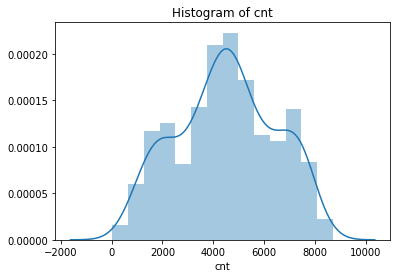

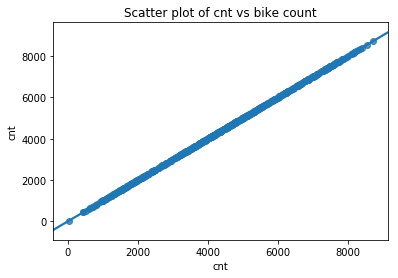

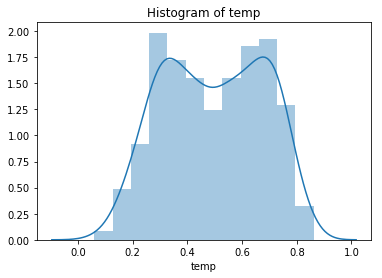

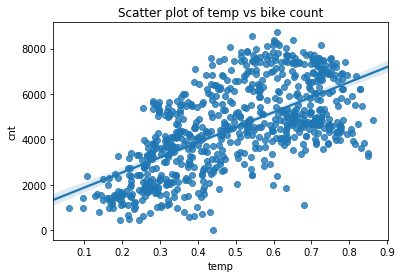

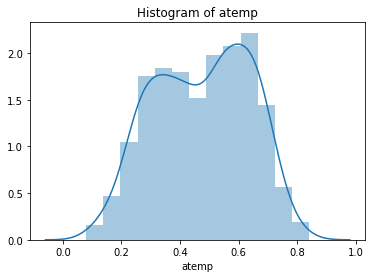

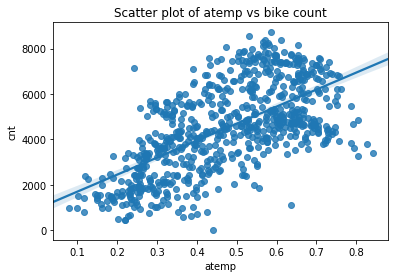

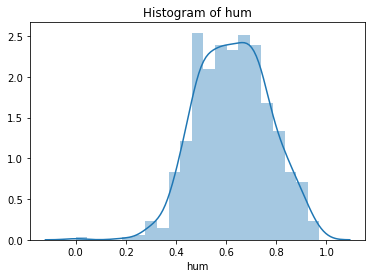

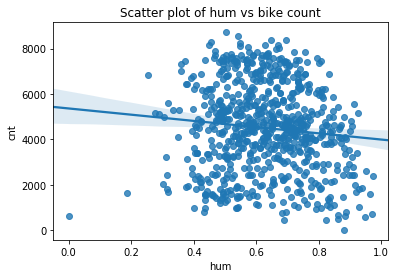

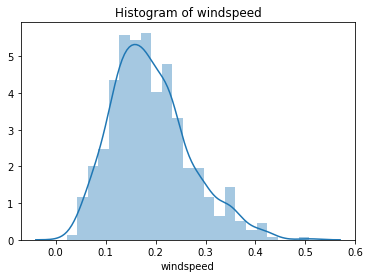

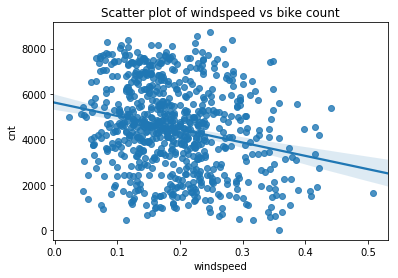

In [12]:
##Data visualisation
## numerical features
%matplotlib inline
for i in numerical_features:
    plot.figure()
    sns.distplot(data_set[i]).set_title("Histogram of "+i)
    plot.figure()
    sns.regplot(data_set[i],data_set["cnt"]).set_title("Scatter plot of "+i+" vs bike count")

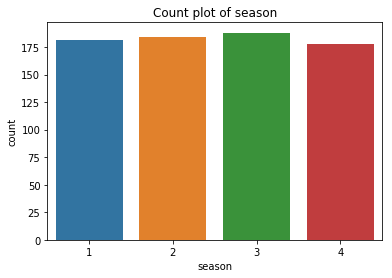

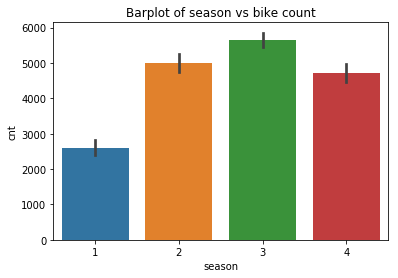

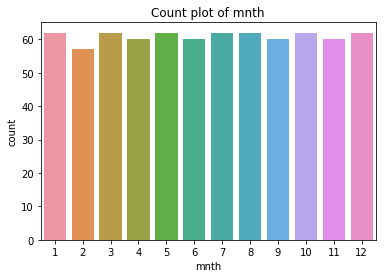

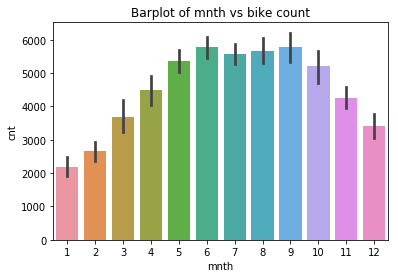

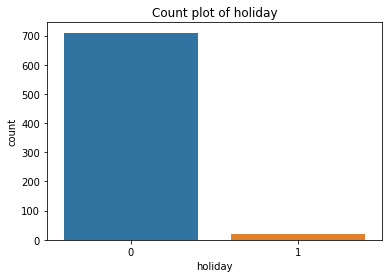

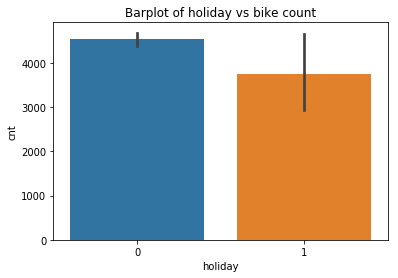

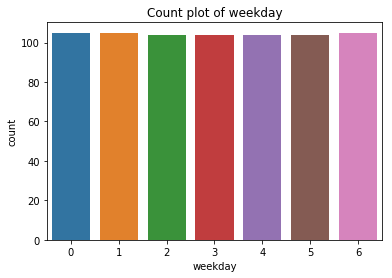

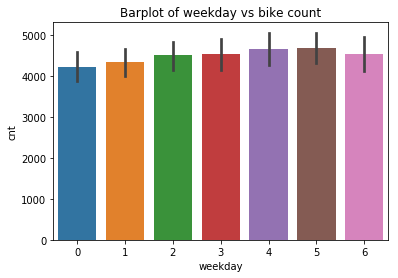

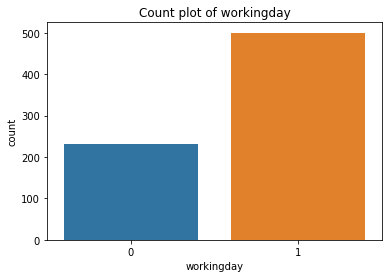

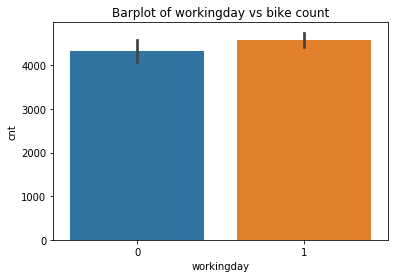

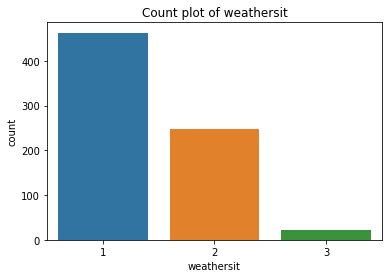

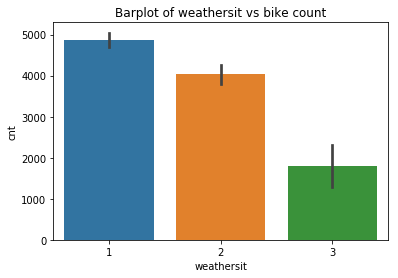

In [13]:
for i in categorical_features:
    plot.figure()
    sns.countplot(data_set[i]).set_title("Count plot of "+i )
    plot.figure()
    sns.barplot(data_set[i],data_set["cnt"]).set_title("Barplot of "+i+" vs bike count")
    

cnt
temp
atemp
hum
windspeed


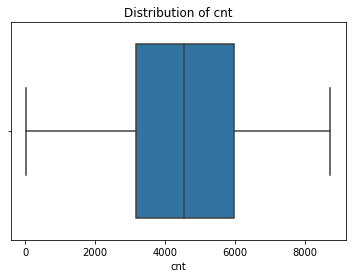

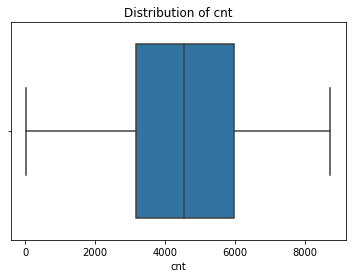

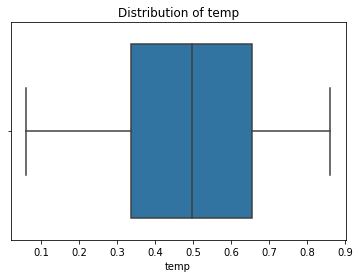

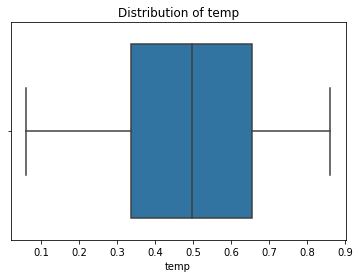

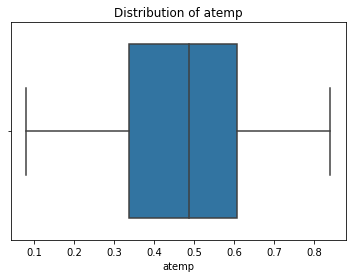

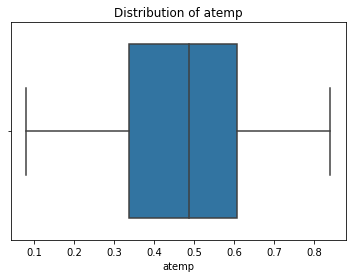

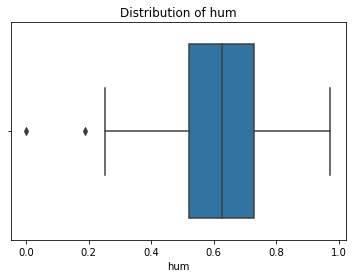

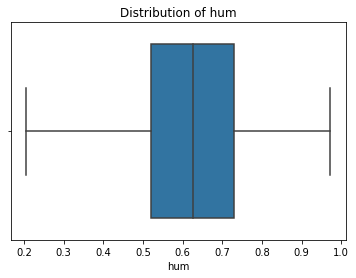

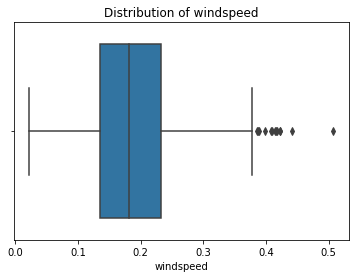

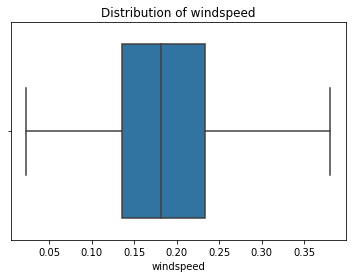

In [14]:
## Outlier 
## we would like to cap the outlier to upper and lower fence
for i in numerical_features:
    print(i)
    q75,q25 = np.percentile(data_set.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25-(1.5*iqr)
    max = q75+(1.5*iqr)
    
    plot.figure()
    sns.boxplot(data_set[i]).set_title("Distribution of" + " "+ i)
    
    data_set.loc[data_set.loc[:,i]<min,i] = min
    data_set.loc[data_set.loc[:,i]>max,i] = max
    
    plot.figure()
    sns.boxplot(data_set[i]).set_title("Distribution of" + " "+ i)

In [15]:
#feature scaling - normalisation 
data_set["cnt"] = (data_set["cnt"]-np.min(data_set["cnt"]))/(np.max(data_set["cnt"])-np.min(data_set["cnt"]))

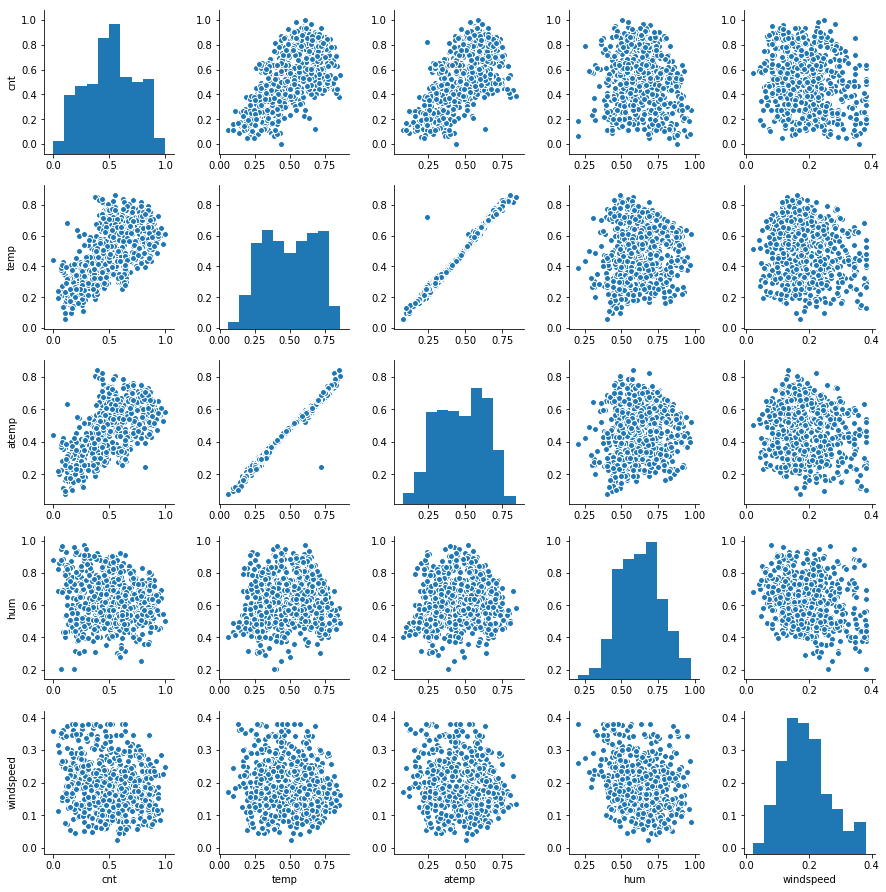

In [16]:
sns.pairplot(data_set[numerical_features])

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627494,0.631066,-0.105664,-0.233657
temp,0.627494,1.000000,0.991702,0.126722,-0.156916
atemp,0.631066,0.991702,1.000000,0.139924,-0.182948
hum,-0.105664,0.126722,0.139924,1.000000,-0.241160
windspeed,-0.233657,-0.156916,-0.182948,-0.241160,1.000000


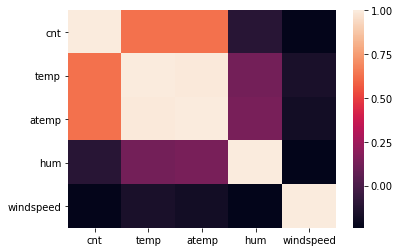

In [17]:
## Correlation 
sns.heatmap(data_set[numerical_features].corr())
data_set[numerical_features].corr()
## temp and atemp highly correlated

In [18]:
#multicollinearity
X = data_set[numerical_features].assign(const = 1)
pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
## temp and atemp shows multicollinearity

cnt           1.870477
temp         63.123945
atemp        64.081148
hum           1.178937
windspeed     1.184046
const        53.690600
dtype: float64

In [19]:
## anova test 
for i in categorical_features:
    print(i) 
    print(stats.f_oneway(data_set[i],data_set['cnt']))

season
F_onewayResult(statistic=2234.7131036468481, pvalue=1.1812270473734066e-296)
mnth
F_onewayResult(statistic=2202.3890187080228, pvalue=7.2351429161856712e-294)
holiday
F_onewayResult(statistic=2233.4041277168758, pvalue=1.5301137528987259e-296)
weekday
F_onewayResult(statistic=1106.3742871546431, pvalue=4.742367523581619e-181)
workingday
F_onewayResult(statistic=77.813963359979383, pvalue=3.1624070118212319e-18)
weathersit
F_onewayResult(statistic=1632.0856144299062, pvalue=3.56582852113021e-240)


In [20]:
#temp and atemp shows collinearity hence one of them is removed
## also while analysing the data through visualisation we had seen that holiday and working
data_set = data_set.drop(["temp","yr"],axis=1)

In [21]:
##sampling
#Let us split our data into train and test ,with 75% data in the test set
data_set_test , data_set_train = train_test_split(data_set,test_size = 0.25)
data_set_train.shape
x_train = data_set_train.drop("cnt",axis = 1)
y_train = data_set_train["cnt"]
x_test = data_set_test.drop("cnt",axis = 1)
y_test = data_set_test["cnt"]

In [22]:
##model development
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(x_train,y_train)
predictLR = modelLR.predict(x_test)
math.sqrt(mean_squared_error(y_test,predictLR))

0.15651828682730487

In [23]:
import statsmodels.api as sm
modelLR = sm.OLS(data_set_train.iloc[:,9],data_set_train.iloc[:,0:9],data = data_set_train).fit()
predictLR = modelLR.predict(x_test)
modelLR.summary(),math.sqrt(mean_squared_error(y_test,predictLR))

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    cnt   R-squared:                       0.921
 Model:                            OLS   Adj. R-squared:                  0.917
 Method:                 Least Squares   F-statistic:                     226.3
 Date:                Mon, 28 Jan 2019   Prob (F-statistic):           3.97e-91
 Time:                        22:55:33   Log-Likelihood:                 78.470
 No. Observations:                 183   AIC:                            -138.9
 Df Residuals:                     174   BIC:                            -110.1
 Df Model:                           9                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [24]:
# fitted values (need a constant term for intercept)
model_fitted_y = modelLR.fittedvalues

# model residuals
model_residuals = modelLR.resid

# normalized residuals
model_norm_residuals = modelLR.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = modelLR.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = modelLR.get_influence().cooks_distance[0]

Text(0,0.5,'Residuals')

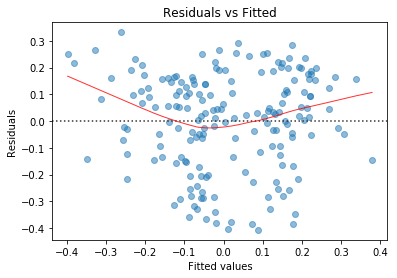

In [25]:
##Residual vs fitted plot 
plot_lm_1 = plot.figure(1)

plot_lm_1.axes[0] = sns.residplot(model_residuals, 'cnt', data=data_set_train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

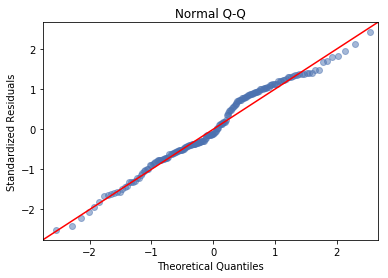

In [26]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

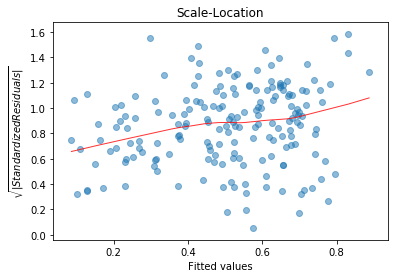

In [27]:
##Scale Location plot for heteroscedasticity check
from statsmodels.graphics.gofplots import ProbPlot

plot_lm_3 = plot.figure(3)
plot.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

Text(0,0.5,'Standardized Residuals')

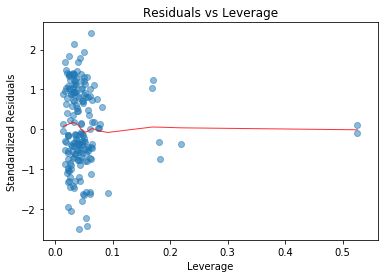

In [28]:
##Leverage Plot 
plot_lm_4 = plot.figure(4)
plot.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

In [29]:
#Decision Tree
modelDT = DecisionTreeRegressor(max_depth=2)
modelDT.fit(x_train,y_train)
predictDT = modelDT.predict(x_test)
math.sqrt(mean_squared_error(y_test,predictDT))

0.16349659361816243

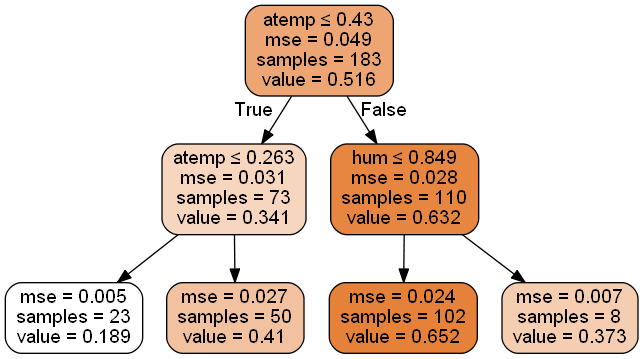

In [30]:
#!pip install graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.feature_extraction import DictVectorizer

dot_data = StringIO()
export_graphviz(modelDT.fit(x_train,y_train), out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [31]:
print(dict(zip(data_set.columns, modelDT.feature_importances_)))

{'season': 0.0, 'mnth': 0.0, 'holiday': 0.0, 'weekday': 0.0, 'workingday': 0.0, 'weathersit': 0.0, 'atemp': 0.88601142720167347, 'hum': 0.1139885727983266, 'windspeed': 0.0}


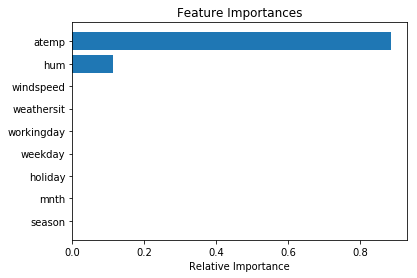

In [32]:
features = data_set.columns
importances = modelDT.feature_importances_
indices = np.argsort(importances)
plot.title('Feature Importances')
plot.barh(range(len(indices)), importances[indices])
plot.yticks(range(len(indices)), [features[i] for i in indices])
plot.xlabel('Relative Importance')
plot.show()

In [33]:
#Random Forest 
modelRF = RandomForestRegressor(max_depth=10,n_estimators= 100,random_state=0,max_features=9)
modelRF.fit(x_train,y_train)
predictRF = modelRF.predict(x_test)
math.sqrt(mean_squared_error(y_test,predictRF))

0.14453714133856857

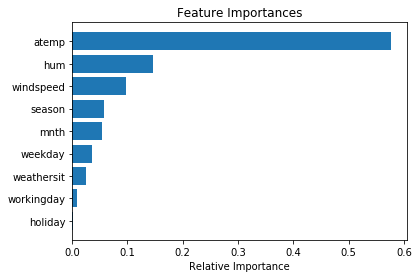

In [34]:
features = data_set.columns
importances = modelRF.feature_importances_
indices = np.argsort(importances)
plot.title('Feature Importances')
plot.barh(range(len(indices)), importances[indices])
plot.yticks(range(len(indices)), [features[i] for i in indices])
plot.xlabel('Relative Importance')
plot.show()

C:\Users\Garima\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


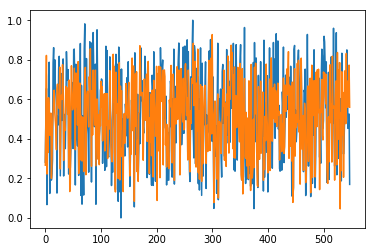

In [35]:
x = list(range(len(data_set_test.index)))
data_set_test["x"] = x
plot.plot(data_set_test["x"],data_set_test["cnt"],data_set_test["x"],predictLR)

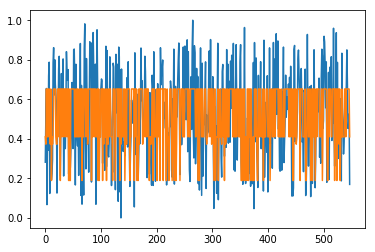

In [36]:
plot.plot(data_set_test["x"],data_set_test["cnt"],data_set_test["x"],predictDT)

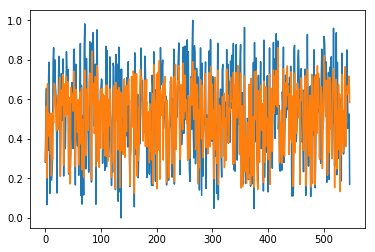

In [37]:
plot.plot(data_set_test["x"],data_set_test["cnt"],data_set_test["x"],predictRF)

In [38]:
##Generating sample data and storing in the sample.csv file
sample_data_train,sample_data_test = train_test_split(data_set,test_size = 0.50)
sample_data_X = sample_data_train.drop(["cnt"],axis=1)
modelRF_predict = modelRF.predict(sample_data_X)
math.sqrt(mean_squared_error(sample_data_train["cnt"],modelRF_predict))

0.129831313453984

In [39]:
#sample data
sample_data_XY = sample_data_X
sample_data_XY["cnt"] = modelRF_predict*(count_max-count_min)+count_min
sample_data_XY["cnt"] = round(sample_data_XY["cnt"])
sample_data_XY.to_csv("Sample.csv")